In [1]:
#Importing all the libraries we need
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statistics

In [3]:
#Reading in the data sets
airports = pd.read_csv(r'/data/Airport_Codes.csv', low_memory = False)
flights = pd.read_csv(r'/Flights.csv', low_memory = False)
tickets = pd.read_csv(r'/Tickets.csv', low_memory = False)

In [4]:
#Look at the chapes of our data sets
data_shape = [tickets.shape, flights.shape, airports.shape]
data_shape

[(1167285, 12), (1915886, 16), (55369, 8)]

In [5]:
#Starting with airports data we look at the null values
airports.isnull().sum()

TYPE                0
NAME                0
ELEVATION_FT     7015
CONTINENT       27843
ISO_COUNTRY       247
MUNICIPALITY     5706
IATA_CODE       46187
COORDINATES         0
dtype: int64

In [6]:
#Filter with only medium and large airports according to the prompt
airports = airports[airports['TYPE'].isin(['medium_airport', 'large_airport'])]
#Filter with US only since we are looking at domestic flights
airports = airports[airports['ISO_COUNTRY'].isin(['US'])]
#reset index
airports = airports.reset_index(drop=True)

In [7]:
#Split coordinates into longitude and latitude to make it easier for future visualizations
airports[['Longitude', 'Latitude']] = airports['COORDINATES'].str.split(',', expand=True)

In [8]:
#Delete columns that are not needed
airports = airports.drop(['COORDINATES','CONTINENT','ELEVATION_FT','MUNICIPALITY'], axis = 1)

In [9]:
#Drop duplicates function that we can use later on
def drop_duplicates(dataframe, subset=None, keep='first'):
    return dataframe.drop_duplicates(subset=subset, keep=keep)

In [10]:
#Dropping the duplicates
airports = drop_duplicates(airports)

In [19]:
#Columns are lookiing much better
airports.isna().sum()

TYPE            0
NAME            0
ISO_COUNTRY     0
IATA_CODE      37
Longitude       0
Latitude        0
dtype: int64

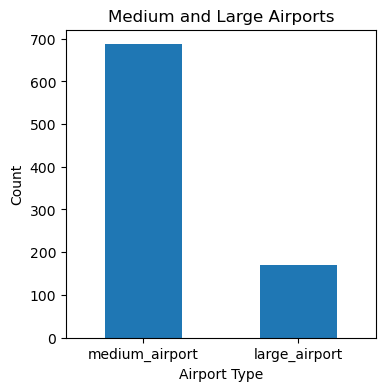

In [21]:
#Bar chart
counts = airports['TYPE'].value_counts()

plt.figure(figsize=(4,4))
counts.plot(kind='bar')
plt.title('Medium and Large Airports')
plt.xlabel('Airport Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

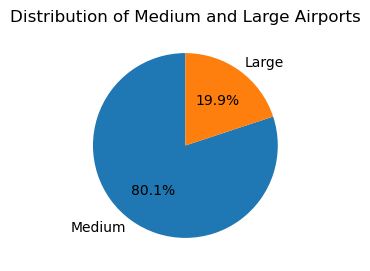

In [23]:
#Pie Chart
plt.figure(figsize=(3,3))
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Medium', 'Large'])
plt.title('Distribution of Medium and Large Airports')
plt.ylabel('')
plt.show()

In [25]:
#Seems like some columns need to be converted to float values and 
flights

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.970000
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.550000
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.910000
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.670000
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915881,3/23/19,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.794884
1915882,3/24/19,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.0,-1.0,0.0,106,****,0.538399
1915883,3/25/19,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,-25.0,0.0,106,****,0.955579
1915884,3/26/19,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.595344


In [27]:
#Air_Time and Distance need to be float64 as well
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915886 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           object 
 14  DISTANCE           object 
 15  OCCUPANCY_RATE     float64
dtypes: float64(4), int64(2), object(10)
memory usage: 233.9+ MB


In [29]:
#Function to turn the columns to floats in case we need to use this function again later
def convert_to_numeric(dataframe, columns, errors='coerce'):
    for column in columns:
        dataframe[column] = pd.to_numeric(dataframe[column], errors=errors)
    return dataframe

In [31]:
#Converting to floats
flights = convert_to_numeric(flights, columns = ['AIR_TIME', 'DISTANCE'])

In [32]:
#Canceled flights
flights = flights[flights['CANCELLED'] == 0]

In [33]:
#Dropping duplicates
flights = drop_duplicates(flights)

In [35]:
#I also want to look at the skewed data
numeric_df = flights.select_dtypes(include=['number'])

# Calculate skewness for each numeric column
skewness = numeric_df.skew()

In [37]:
#Seems like occupancy rates are but Dep_delay, Arr_delay, Air_time, Distance are outliers and seems like they have a lot of nan values as well
skewness

ORIGIN_AIRPORT_ID     0.066143
DEST_AIRPORT_ID       0.065825
DEP_DELAY            10.081252
ARR_DELAY             8.995729
CANCELLED             0.000000
AIR_TIME              1.552307
DISTANCE              1.542156
OCCUPANCY_RATE       -0.001829
dtype: float64

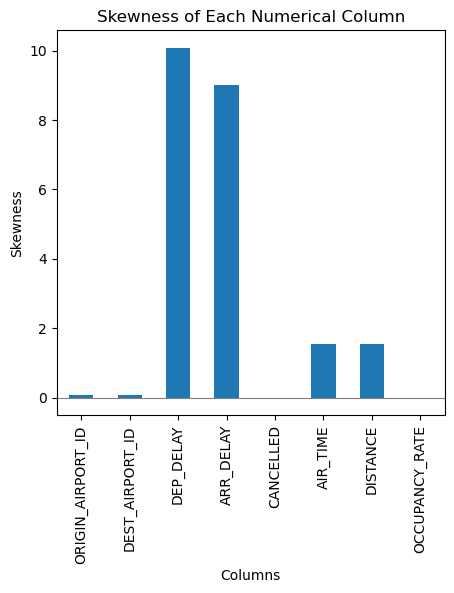

In [38]:
#Plotted result
plt.figure(figsize=(5, 5))
skewness.plot(kind='bar', title='Skewness of Each Numerical Column')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.axhline(0, color='gray', linewidth=0.8)  # Adding a line at skewness = 0 for reference
plt.show()

In [39]:
flights.isna().sum()

FL_DATE                 0
OP_CARRIER              0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DESTINATION             0
DEST_CITY_NAME          0
DEP_DELAY               0
ARR_DELAY            4368
CANCELLED               0
AIR_TIME             4616
DISTANCE              268
OCCUPANCY_RATE         31
dtype: int64

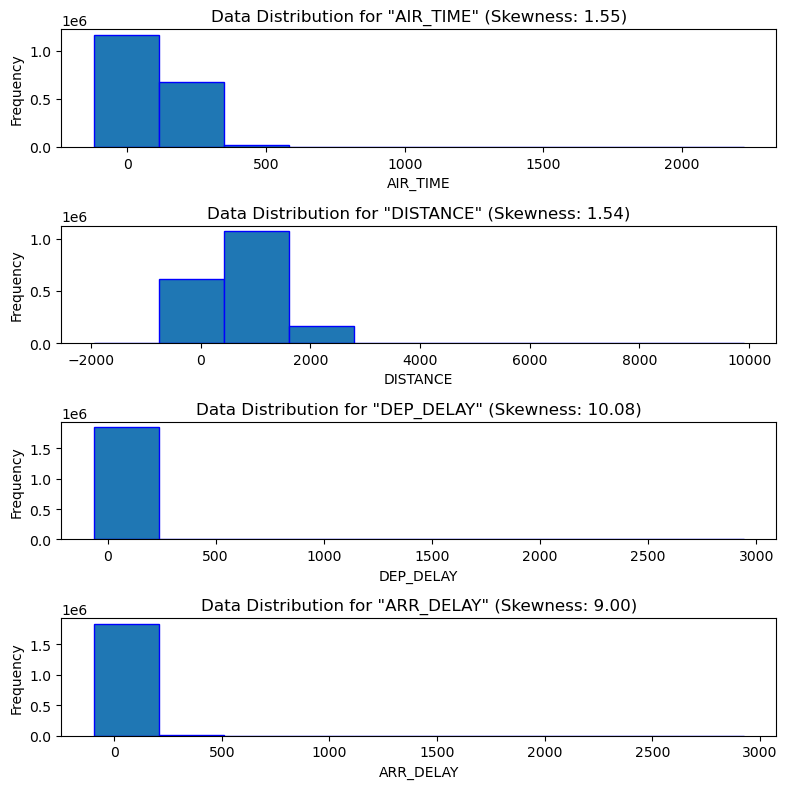

In [43]:
#Columns that I want to see the skewness in
columns_skewed = ['AIR_TIME', 'DISTANCE', 'DEP_DELAY', 'ARR_DELAY']

#Filter to only include the selected columns and calculate skewness for each
skewed_columns = {col: flights[col].skew() for col in columns_skewed if flights[col].skew()}

#Plot histograms for skewed columns
plt.figure(figsize=(8, 8))
for i, (col, skew_value) in enumerate(skewed_columns.items(), start=1):
    plt.subplot(len(skewed_columns), 1, i)
    plt.hist(flights[col].dropna(), bins=10, edgecolor='blue')
    plt.title(f'Data Distribution for "{col}" (Skewness: {skew_value:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [45]:
#We can see that its heavily skewed right but the nan values need to be filled so we need a function to fill the nan values with a median value
def fill_median(df, columns_to_impute):
    for column in columns_to_impute:
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)

In [47]:
#Occupancy rate looks good but others need the function
fill_median(flights, columns_skewed)

In [51]:
#Nan columns look good
flights.isna().sum()

FL_DATE               0
OP_CARRIER            0
TAIL_NUM              0
OP_CARRIER_FL_NUM     0
ORIGIN_AIRPORT_ID     0
ORIGIN                0
ORIGIN_CITY_NAME      0
DEST_AIRPORT_ID       0
DESTINATION           0
DEST_CITY_NAME        0
DEP_DELAY             0
ARR_DELAY             0
CANCELLED             0
AIR_TIME              0
DISTANCE              0
OCCUPANCY_RATE       31
dtype: int64

In [52]:
#Lets look at tickets data
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1166325 non-null  object 
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 106.9+ MB


In [55]:
#Lets look at the head of the data set to see what stands out
#Seems like ITIN_FARE needs to be a numeric column
#Round Trip should be 1
tickets

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
4,201912723509,2019,1,ABI,US,TX,Texas,0.0,MQ,1.0,309.0,MGM
...,...,...,...,...,...,...,...,...,...,...,...,...
1167280,201911284909,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,244.0,ANC
1167281,201911284959,2019,1,YAK,US,AK,Alaska,1.0,AS,1.0,371.0,JNU
1167282,201911284940,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,271.0,JNU
1167283,201911284914,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,603.0,ANC


In [57]:
#Change its type to numeric
tickets['ITIN_FARE'] = pd.to_numeric(tickets['ITIN_FARE'], errors='coerce')

In [59]:
#Drop duplicates
tickets = drop_duplicates(tickets)

In [61]:
#Only have 1 round trip
tickets = tickets[tickets['ROUNDTRIP'] == 1]

In [63]:
#lets look at the nan values
tickets.isna().sum()

ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_NM         0
ROUNDTRIP               0
REPORTING_CARRIER       0
PASSENGERS            960
ITIN_FARE            1657
DESTINATION             0
dtype: int64

In [65]:
tickets_skew = tickets.select_dtypes(include=['number'])

# Calculate skewness for each numeric column
tickets_skewness = tickets_skew.skew()

In [67]:
#Passengers and ITIN_FARE stand out as outliers and skewed the most
tickets_skew

,ITIN_ID,YEAR,QUARTER,ROUNDTRIP,PASSENGERS,ITIN_FARE
0,201912723049,2019,1,1.0,1.0,736.0
1,201912723085,2019,1,1.0,1.0,570.0
2,201912723491,2019,1,1.0,1.0,564.0
3,201912723428,2019,1,1.0,1.0,345.0
10,201912723337,2019,1,1.0,1.0,1647.0
...,...,...,...,...,...,...
1115053,201915099493,2019,1,1.0,1.0,585.0
1115057,201913421100,2019,1,1.0,1.0,692.0
1115058,201913421044,2019,1,1.0,1.0,600.0
1115066,201913420834,2019,1,1.0,1.0,705.0


In [69]:
#Fill the nan values
impute_columns = ['PASSENGERS', 'ITIN_FARE']
fill_median(tickets, impute_columns)

In [71]:
tickets

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
10,201912723337,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,1647.0,JAX
...,...,...,...,...,...,...,...,...,...,...,...,...
1115053,201915099493,2019,1,YUM,US,AZ,Arizona,1.0,YV,1.0,585.0,FLL
1115057,201913421100,2019,1,YUM,US,AZ,Arizona,1.0,OO,1.0,692.0,ALB
1115058,201913421044,2019,1,YUM,US,AZ,Arizona,1.0,OO,1.0,600.0,MRY
1115066,201913420834,2019,1,YUM,US,AZ,Arizona,1.0,OO,1.0,705.0,ELP


In [73]:
#Since the data sets are so big trying to lower the load
for col in flights.select_dtypes(include=['float64']).columns:
    flights[col] = flights[col].astype('float32')

for col in flights.select_dtypes(include=['int64']).columns:
    flights[col] = flights[col].astype('int32')

In [75]:
for col in tickets.select_dtypes(include=['float64']).columns:
   tickets[col] = tickets[col].astype('float32')

for col in tickets.select_dtypes(include=['int64']).columns:
    tickets[col] = tickets[col].astype('int32')

In [79]:
#This makes sure we get one route regardless of the direction to help us in the future calculations.
tickets['ROUTE_ORIGIN'] = tickets[['ORIGIN', 'DESTINATION']].min(axis=1)
tickets['ROUTE_DEST'] = tickets[['ORIGIN', 'DESTINATION']].max(axis=1)

flights['ROUTE_ORIGIN'] = flights[['ORIGIN', 'DESTINATION']].min(axis=1)
flights['ROUTE_DEST'] = flights[['ORIGIN', 'DESTINATION']].max(axis=1)

In [80]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 661036 entries, 0 to 1115067
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ITIN_ID            661036 non-null  int32  
 1   YEAR               661036 non-null  int32  
 2   QUARTER            661036 non-null  int32  
 3   ORIGIN             661036 non-null  object 
 4   ORIGIN_COUNTRY     661036 non-null  object 
 5   ORIGIN_STATE_ABR   661036 non-null  object 
 6   ORIGIN_STATE_NM    661036 non-null  object 
 7   ROUNDTRIP          661036 non-null  float32
 8   REPORTING_CARRIER  661036 non-null  object 
 9   PASSENGERS         661036 non-null  float32
 10  ITIN_FARE          661036 non-null  float32
 11  DESTINATION        661036 non-null  object 
 12  ROUTE_ORIGIN       661036 non-null  object 
 13  ROUTE_DEST         661036 non-null  object 
dtypes: float32(3), int32(3), object(8)
memory usage: 60.5+ MB


In [83]:
#Aggregating since the data wont merge because of the amount of records so had to fgiure a way out
tickets= tickets.groupby(['ROUTE_ORIGIN', 'ROUTE_DEST']).agg({
    'ORIGIN_STATE_NM': 'first',
    'PASSENGERS': 'sum',
    'ITIN_FARE': 'sum'
}).reset_index()


flights = flights.groupby(['ROUTE_ORIGIN', 'ROUTE_DEST']).agg({
    'ORIGIN_CITY_NAME': 'first',
    'DEST_CITY_NAME': 'first',
    'DEP_DELAY': 'sum',
    'ARR_DELAY': 'sum',
    'AIR_TIME': 'sum',
    'DISTANCE': 'sum',
    'OCCUPANCY_RATE': 'sum',
    'CANCELLED': 'count'
}).reset_index()

In [85]:
#Merging flights and tickets
final_merged_data = flights.merge(tickets, how = 'inner', on=['ROUTE_ORIGIN', 'ROUTE_DEST'])

In [87]:
#Merging airports
final_df = pd.merge(final_merged_data, airports, left_on='ROUTE_ORIGIN', right_on='IATA_CODE', how='left', suffixes=('', '_ORIGIN'))
 
 
final_df = pd.merge(final_merged_data, airports, left_on='ROUTE_DEST', right_on='IATA_CODE', how='left', suffixes=('', '_DEST')) 
 

In [89]:
final_df

,ROUTE_ORIGIN,ROUTE_DEST,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,CANCELLED,ORIGIN_STATE_NM,PASSENGERS,ITIN_FARE,TYPE,NAME,ISO_COUNTRY,IATA_CODE,Longitude,Latitude
0,ABE,ATL,"Atlanta, GA","Allentown/Bethlehem/Easton, PA",2983.0,1110.0,43270.0,300328.0,283.980011,434,Pennsylvania,92.0,46020.0,large_airport,Hartsfield Jackson Atlanta International Airport,US,ATL,-84.428101,33.6367
1,ABE,CLT,"Allentown/Bethlehem/Easton, PA","Charlotte, NC",1927.0,737.0,42947.0,241462.0,331.869995,502,Pennsylvania,46.0,17748.0,large_airport,Charlotte Douglas International Airport,US,CLT,-80.94309997558594,35.2140007019043
2,ABE,DTW,"Allentown/Bethlehem/Easton, PA","Detroit, MI",6791.0,2961.0,35665.0,211225.0,320.760010,497,Pennsylvania,99.0,8102.0,large_airport,Detroit Metropolitan Wayne County Airport,US,DTW,-83.35340118408203,42.212398529052734
3,ABE,FLL,"Allentown/Bethlehem/Easton, PA","Fort Lauderdale, FL",216.0,170.0,5897.0,41640.0,24.210001,40,Pennsylvania,94.0,14886.0,large_airport,Fort Lauderdale Hollywood International Airport,US,FLL,-80.152702,26.072599
4,ABE,ORD,"Allentown/Bethlehem/Easton, PA","Chicago, IL",9368.0,7514.0,30879.0,209280.0,207.710007,320,Pennsylvania,39.0,16999.0,large_airport,Chicago O'Hare International Airport,US,ORD,-87.9048,41.9786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,STL,TPA,"St. Louis, MO","Tampa, FL",4757.0,2125.0,49799.0,365849.0,277.220001,421,Missouri,510.0,105580.0,large_airport,Tampa International Airport,US,TPA,-82.533203125,27.975500106811523
2931,STL,TUL,"St. Louis, MO","Tulsa, OK",2013.0,80.0,17938.0,114075.0,210.050003,325,Missouri,93.0,15218.0,large_airport,Tulsa International Airport,US,TUL,-95.88809967041016,36.19839859008789
2932,SYR,TPA,"Tampa, FL","Syracuse, NY",1619.0,684.0,10663.0,79488.0,44.320000,72,New York,132.0,24681.0,large_airport,Tampa International Airport,US,TPA,-82.533203125,27.975500106811523
2933,TPA,TTN,"Trenton, NJ","Tampa, FL",2353.0,1173.0,21007.0,149935.0,100.389999,157,Florida,215.0,5702.0,medium_airport,Trenton Mercer Airport,US,TTN,-74.8134994506836,40.27669906616211


In [89]:
#For the visuals
final_df['route'] = final_df['ORIGIN_CITY_NAME'] + ' TO ' + final_df['DEST_CITY_NAME']

In [91]:
#Top 10 busiest round trip routes
busiest_routes = final_df.nlargest(10, 'OCCUPANCY_RATE')

busiest_routes = busiest_routes[['ROUTE_ORIGIN', 'ROUTE_DEST', 'ORIGIN_STATE_NM', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'OCCUPANCY_RATE', 'Longitude','Latitude']]
print(busiest_routes)

     ROUTE_ORIGIN ROUTE_DEST ORIGIN_STATE_NM   ORIGIN_CITY_NAME  \
2230          LAX        SFO      California  San Francisco, CA   
2273          LGA        ORD        New York       New York, NY   
2134          LAS        LAX          Nevada      Las Vegas, NV   
2076          JFK        LAX        New York       New York, NY   
2229          LAX        SEA      California        Seattle, WA   
564           BOS        LGA   Massachusetts       New York, NY   
1831          HNL        OGG          Hawaii        Kahului, HI   
2701          PDX        SEA          Oregon       Portland, OR   
193           ATL        MCO         Georgia        Atlanta, GA   
189           ATL        LGA         Georgia        Atlanta, GA   

       DEST_CITY_NAME  OCCUPANCY_RATE           Longitude             Latitude  
2230  Los Angeles, CA     5412.770020            -122.375    37.61899948120117  
2273      Chicago, IL     4645.129883            -87.9048              41.9786  
2134  Los Angeles, 

In [93]:
busiest_routes = busiest_routes.head(10)
busiest_routes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2230 to 189
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ROUTE_ORIGIN      10 non-null     object 
 1   ROUTE_DEST        10 non-null     object 
 2   ORIGIN_STATE_NM   10 non-null     object 
 3   ORIGIN_CITY_NAME  10 non-null     object 
 4   DEST_CITY_NAME    10 non-null     object 
 5   OCCUPANCY_RATE    10 non-null     float32
 6   Longitude         10 non-null     object 
 7   Latitude          10 non-null     object 
dtypes: float32(1), object(7)
memory usage: 680.0+ bytes


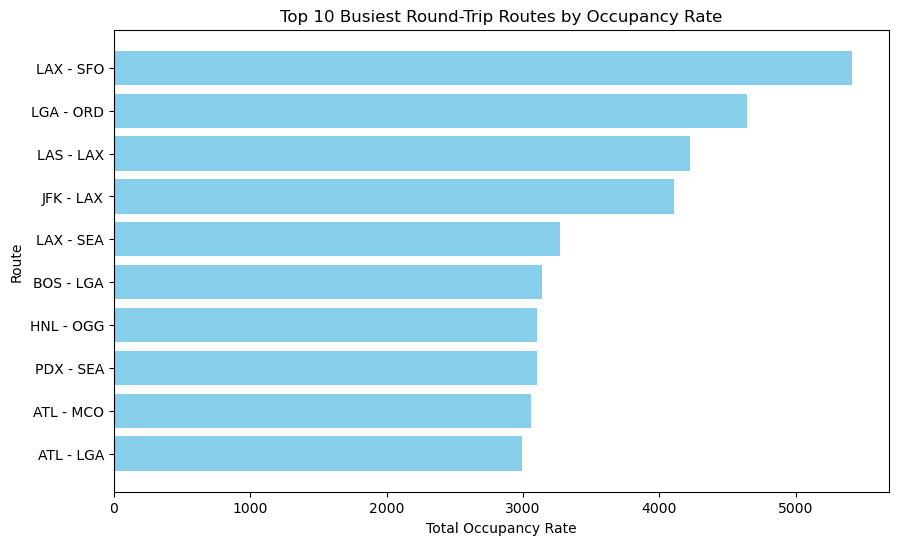

In [95]:
#Plot to show
plt.figure(figsize=(10, 6))
plt.barh(
    busiest_routes['ROUTE_ORIGIN'] + ' - ' + busiest_routes['ROUTE_DEST'],
    busiest_routes['OCCUPANCY_RATE'],
    color='skyblue'
)
plt.xlabel('Total Occupancy Rate')
plt.ylabel('Route')
plt.title('Top 10 Busiest Round-Trip Routes by Occupancy Rate')
plt.gca().invert_yaxis()
plt.show()

In [97]:
#All the business rules
FUEL_COST_PER_MILE = 8
DEPRECIATION_COST_PER_MILE = 1.18
MEDIUM_AIRPORT_COST = 5000
LARGE_AIRPORT_COST = 10000
DELAY_COST_PER_MIN = 75
final_df['Airport_Cost'] = final_df['TYPE'].apply(lambda x: 5000 if x == 'medium_airport' else 10000)
BAGGAGE_FEE = 35
BAGGAGE_PERCENT = 0.5
final_df['baggage_cost']=final_df['OCCUPANCY_RATE']*70*0.5
merged_data = final_df

#Total Cost
merged_data['Total_Cost'] = (
    (FUEL_COST_PER_MILE + DEPRECIATION_COST_PER_MILE) * merged_data['DISTANCE'] * 2 +  # round trip distance
    merged_data['Airport_Cost'] * 2 +  # round trip airport fixed cost using the new 'Airport_Cost'
    merged_data.apply(lambda x: max(0, x['DEP_DELAY'] - 15) * DELAY_COST_PER_MIN + max(0, x['ARR_DELAY'] - 15) * DELAY_COST_PER_MIN, axis=1)
)

#Total Revenue
merged_data['Total_Revenue'] = (
    merged_data['ITIN_FARE'].astype(float) * merged_data['PASSENGERS']  
)+ (merged_data['baggage_cost'])
                                     

#Profit
merged_data['Profit'] = merged_data['Total_Revenue'] - merged_data['Total_Cost']

# Grouping important columns
route_profitability = merged_data.groupby(['ROUTE_ORIGIN', 'ROUTE_DEST' ,'route','CANCELLED','PASSENGERS','OCCUPANCY_RATE','ITIN_FARE','ARR_DELAY']).agg(
    Total_Revenue=('Total_Revenue', 'sum'),
    Total_Cost=('Total_Cost', 'sum'),
    Profit=('Profit', 'sum'),
    Total_Flights=('ROUTE_ORIGIN', 'size')  
).reset_index()

merged_data['Total_Fare_Revenue'] = merged_data['ITIN_FARE'].astype(float) * merged_data['PASSENGERS']
merged_data['Total_Baggage_Fees'] = merged_data['baggage_cost']
merged_data['Total_Revenue'] = merged_data['Total_Fare_Revenue'] + merged_data['Total_Baggage_Fees']


#Top 10 profitable routes
top_10_profitable_routes = route_profitability.sort_values(by='Profit', ascending=False).head(10)

In [101]:
top_10_profitable_routes = route_profitability.sort_values(by='Profit', ascending=False).head(10)
#Fixing rows that are too long number wise
top_10_profitable_routes['Total_Revenue'] = top_10_profitable_routes['Total_Revenue'].map('${:,.2f}'.format)
top_10_profitable_routes['Profit'] = top_10_profitable_routes['Profit'].map('${:,.2f}'.format)
top_10_profitable_routes['Total_Cost'] = top_10_profitable_routes['Total_Cost'].map('${:,.2f}'.format)
top_10_profitable_routes

,ROUTE_ORIGIN,ROUTE_DEST,route,CANCELLED,PASSENGERS,OCCUPANCY_RATE,ITIN_FARE,ARR_DELAY,Total_Revenue,Total_Cost,Profit,Total_Flights
2076,JFK,LAX,"New York, NY TO Los Angeles, CA",6320,5845.0,4108.470215,1503492.0,-12033.0,"$8,788,054,536.45","$291,256,836.00","$8,496,797,700.45",1
2103,JFK,SFO,"San Francisco, CA TO New York, NY",3721,3240.0,2418.100098,1109672.0,25344.0,"$3,595,421,913.50","$182,872,666.00","$3,412,549,247.50",1
1619,EWR,SFO,"San Francisco, CA TO Newark, NJ",2424,2785.0,1575.369995,1180385.0,34967.0,"$3,287,427,362.95","$120,702,858.00","$3,166,724,504.95",1
2273,LGA,ORD,"New York, NY TO Chicago, IL",7156,4923.0,4645.129883,496741.0,140322.0,"$2,445,618,522.55","$118,298,092.00","$2,327,320,430.55",1
1583,EWR,LAX,"Los Angeles, CA TO Newark, NJ",2114,2894.0,1381.579956,694608.0,2516.0,"$2,010,243,907.30","$97,047,025.00","$1,913,196,882.30",1
2212,LAX,ORD,"Chicago, IL TO Los Angeles, CA",3717,3700.0,2413.679199,548253.0,24824.0,"$2,028,620,578.77","$125,035,718.00","$1,903,584,860.77",1
186,ATL,LAX,"Atlanta, GA TO Los Angeles, CA",3090,2848.0,2005.632812,680678.0,12188.0,"$1,938,641,141.15","$113,634,976.00","$1,825,006,165.15",1
189,ATL,LGA,"Atlanta, GA TO New York, NY",4594,3413.0,2991.199951,497513.0,25016.0,"$1,698,116,561.00","$70,060,457.00","$1,628,056,104.00",1
2230,LAX,SFO,"San Francisco, CA TO Los Angeles, CA",8340,4400.0,5412.770020,338125.0,130862.0,"$1,487,939,446.95","$72,992,077.00","$1,414,947,369.95",1
590,BOS,SFO,"Boston, MA TO San Francisco, CA",2256,2064.0,1472.760010,690076.0,31006.0,"$1,424,368,410.60","$117,992,670.00","$1,306,375,740.60",1


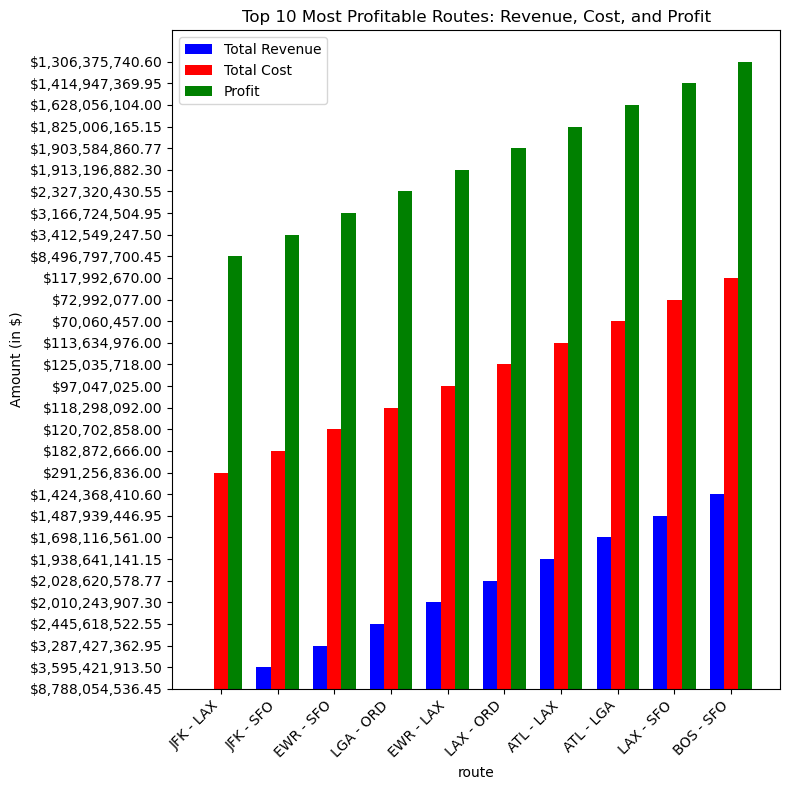

In [103]:
#Chart to compare revenue, cost, profit
fig, x = plt.subplots(figsize=(8, 8))

bar_width = 0.25
index = range(len(top_10_profitable_routes))

x.bar([i for i in index], top_10_profitable_routes['Total_Revenue'], bar_width, label='Total Revenue', color='blue')
x.bar([i + bar_width for i in index], top_10_profitable_routes['Total_Cost'], bar_width, label='Total Cost', color='red')
x.bar([i + bar_width*2 for i in index], top_10_profitable_routes['Profit'], bar_width, label='Profit', color='green')

x.set_xlabel('route')
x.set_ylabel('Amount (in $)')
x.set_title('Top 10 Most Profitable Routes: Revenue, Cost, and Profit')
x.set_xticks([i + bar_width for i in index])
x.set_xticklabels(top_10_profitable_routes['ROUTE_ORIGIN'] + ' - ' + top_10_profitable_routes['ROUTE_DEST'], rotation=45, ha="right")
x.legend()

plt.tight_layout()
plt.show()


In [105]:
#Calculating the most routes to invest in
route_summary = top_10_profitable_routes.groupby(['ROUTE_ORIGIN', 'ROUTE_DEST','CANCELLED','route','Profit','Total_Cost','Total_Revenue']).agg({
    'PASSENGERS': 'sum',                
    'OCCUPANCY_RATE': 'mean',           
    'ITIN_FARE': 'mean',                
    'ARR_DELAY': 'mean' ,
}).reset_index()
top_routes_to_invest = route_summary.sort_values(by='PASSENGERS', ascending=False).head(5)
top_routes_to_invest

,ROUTE_ORIGIN,ROUTE_DEST,CANCELLED,route,Profit,Total_Cost,Total_Revenue,PASSENGERS,OCCUPANCY_RATE,ITIN_FARE,ARR_DELAY
5,JFK,LAX,6320,"New York, NY TO Los Angeles, CA","$8,496,797,700.45","$291,256,836.00","$8,788,054,536.45",5845.0,4108.470215,1503492.0,-12033.0
9,LGA,ORD,7156,"New York, NY TO Chicago, IL","$2,327,320,430.55","$118,298,092.00","$2,445,618,522.55",4923.0,4645.129883,496741.0,140322.0
8,LAX,SFO,8340,"San Francisco, CA TO Los Angeles, CA","$1,414,947,369.95","$72,992,077.00","$1,487,939,446.95",4400.0,5412.770020,338125.0,130862.0
7,LAX,ORD,3717,"Chicago, IL TO Los Angeles, CA","$1,903,584,860.77","$125,035,718.00","$2,028,620,578.77",3700.0,2413.679199,548253.0,24824.0
1,ATL,LGA,4594,"Atlanta, GA TO New York, NY","$1,628,056,104.00","$70,060,457.00","$1,698,116,561.00",3413.0,2991.199951,497513.0,25016.0


In [107]:
top_routes_to_invest.head(5)
top_routes_to_invest.to_csv('invest.csv')

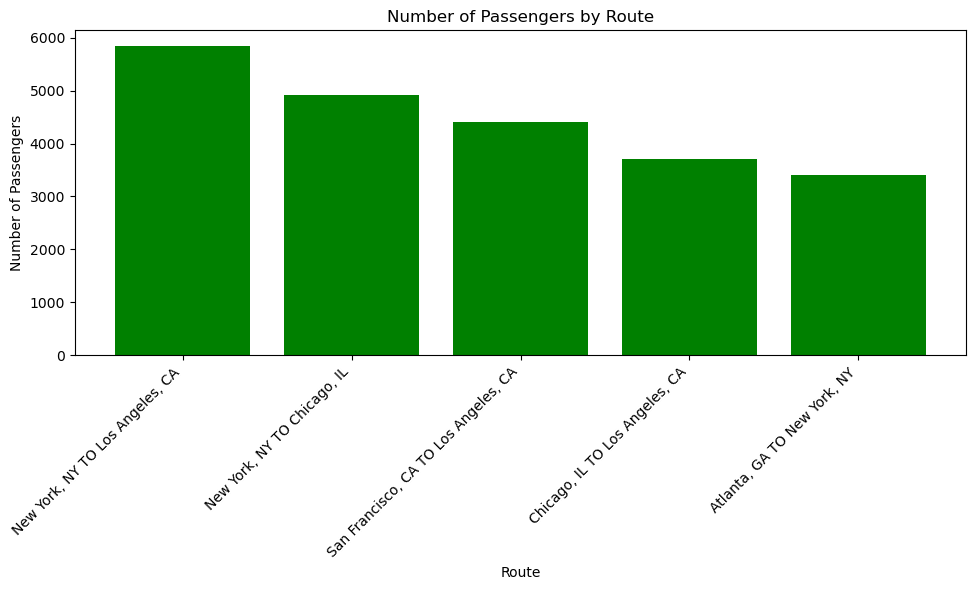

In [109]:
plt.figure(figsize=(10, 6))
plt.bar(top_routes_to_invest['route'], top_routes_to_invest['PASSENGERS'], color='Green')

plt.xlabel('Route')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Route')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [111]:
#Finding the breakeven of most profitable by adding the column and deviding by profit per flight
top_routes_to_invest['Upfront_Cost'] = 90000000

In [113]:
#Fixing the total count
top_routes_to_invest.rename(columns={'CANCELLED': 'Total_count'}, inplace=True)
top_routes_to_invest['Total_count'] = pd.to_numeric(top_routes_to_invest['Total_count'], errors='coerce')

In [115]:
#Getting rid of $ and ,
top_routes_to_invest['Profit'] = top_routes_to_invest['Profit'].replace('[\$,]', '', regex=True).astype(float)
top_routes_to_invest['Upfront_Cost'] = pd.to_numeric(top_routes_to_invest['Upfront_Cost'], errors='coerce')

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/5f/b4k88p2564s7t7x78_rhygnr0000gn/T/ipykernel_52656/559480022.py:2: SyntaxWarning: invalid escape sequence '\$'
  top_routes_to_invest['Profit'] = top_routes_to_invest['Profit'].replace('[\$,]', '', regex=True).astype(float)


In [117]:
#Getting the profit per flight
top_routes_to_invest['Profit_Per_FLight'] = top_routes_to_invest['Profit'] / top_routes_to_invest['Total_count']
top_routes_to_invest

,ROUTE_ORIGIN,ROUTE_DEST,Total_count,route,Profit,Total_Cost,Total_Revenue,PASSENGERS,OCCUPANCY_RATE,ITIN_FARE,ARR_DELAY,Upfront_Cost,Profit_Per_FLight
5,JFK,LAX,6320,"New York, NY TO Los Angeles, CA",8.496798e+09,"$291,256,836.00","$8,788,054,536.45",5845.0,4108.470215,1503492.0,-12033.0,90000000,1.344430e+06
9,LGA,ORD,7156,"New York, NY TO Chicago, IL",2.327320e+09,"$118,298,092.00","$2,445,618,522.55",4923.0,4645.129883,496741.0,140322.0,90000000,3.252264e+05
8,LAX,SFO,8340,"San Francisco, CA TO Los Angeles, CA",1.414947e+09,"$72,992,077.00","$1,487,939,446.95",4400.0,5412.770020,338125.0,130862.0,90000000,1.696580e+05
7,LAX,ORD,3717,"Chicago, IL TO Los Angeles, CA",1.903585e+09,"$125,035,718.00","$2,028,620,578.77",3700.0,2413.679199,548253.0,24824.0,90000000,5.121294e+05
1,ATL,LGA,4594,"Atlanta, GA TO New York, NY",1.628056e+09,"$70,060,457.00","$1,698,116,561.00",3413.0,2991.199951,497513.0,25016.0,90000000,3.543875e+05


In [119]:
#Breakeven calculations
top_routes_to_invest['Breakeven'] = top_routes_to_invest['Upfront_Cost'] / top_routes_to_invest['Profit_Per_FLight']

Breakeven_Profit = top_routes_to_invest


In [130]:
#Tableau Dashboard
https://public.tableau.com/app/profile/saqib.usmani/viz/CapitolOneDataChallengeSaqib/Dashboard1